In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from load_data_and_distribution_analisys import split_dataset_v1, plot_confusion_matrix, load_dataset_cleaned

# Un primo esempio

Di seguito riportiamo un semplice modello di Logistic Regression per vedere che lower bound abbiamo per quanto riguarda le metriche di valutazione (accuratezza, recall, precisione, f1_score).

In [2]:
dataset_cleaned = load_dataset_cleaned()

Path to dataset files: /Users/marcodeano/.cache/kagglehub/datasets/sooyoungher/smoking-drinking-dataset/versions/2
   sex  age  height  weight  ...  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN
0    1   35     170      75  ...      35.0       40.0               1.0       1
1    1   30     180      80  ...      36.0       27.0               3.0       0
2    1   40     165      75  ...      32.0       68.0               1.0       0
3    1   50     175      80  ...      34.0       18.0               1.0       0
4    1   50     165      60  ...      12.0       25.0               1.0       0

[5 rows x 24 columns]


In [19]:
X_smoke, Y_smoke, X_drink, Y_drink = split_dataset_v1(dataset_cleaned)

In [20]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_smoke, Y_smoke, test_size=0.3, random_state=42)
dummy_classifier = LogisticRegression()
dummy_classifier.fit(X_train_s, y_train_s)
y_pred = dummy_classifier.predict(X_test_s)
accuracy = accuracy_score(y_test_s, y_pred) # balanced_accuracy_score(y_test_s, y_pred)
precision = precision_score(y_test_s, y_pred, average="weighted")
recall = recall_score(y_test_s, y_pred, average="weighted")
f1 = f1_score(y_test_s, y_pred, average="weighted")
print(f"Accuratezza: {accuracy*100:.2f}%")
print(f"Precisione: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1: {f1*100:.2f}%")

Accuratezza: 64.69%
Precisione: 59.88%
Recall: 64.69%
F1: 59.66%


/Users/marcodeano/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


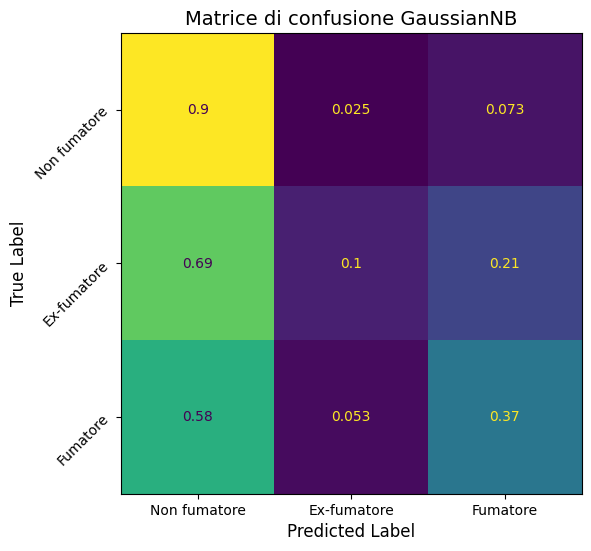

In [14]:
plot_confusion_matrix(y_test_s, y_pred, ["Non fumatore", "Ex-fumatore", "Fumatore"], "Matrice di confusione GaussianNB")

In [15]:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_drink, Y_drink, test_size=0.3, random_state=42)
dummy_classifier = LogisticRegression()
dummy_classifier.fit(X_train_d, y_train_d)
y_pred = dummy_classifier.predict(X_test_d)
accuracy = accuracy_score(y_test_d, y_pred)
precision = precision_score(y_test_d, y_pred)
recall = recall_score(y_test_d, y_pred)
f1 = f1_score(y_test_d, y_pred)
print(f"Accuratezza: {accuracy*100:.2f}%")
print(f"Precisione: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1: {f1*100:.2f}%")

Accuratezza: 70.33%
Precisione: 70.57%
Recall: 69.67%
F1: 70.12%


/Users/marcodeano/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


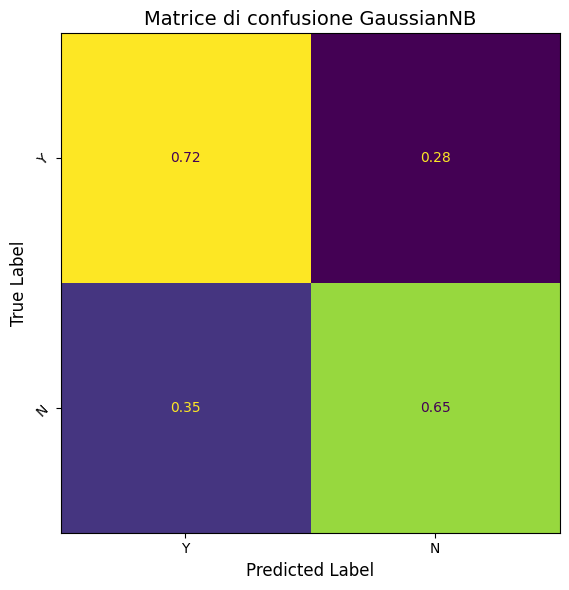

In [9]:
plot_confusion_matrix(y_test_d, y_pred, ["Y", "N"], "Matrice di confusione GaussianNB")

__Prossimi passi__: da adesso in poi l'obiettivo sarà migliorare sempre di più le metriche delle predizioni sia per il caso del fumo che del bere, utilizzando modelli di apprendimento diversi e sfruttando tecniche di normalizzazione, feature selection, dimensionality reduction, encoding, etc. 